# Binary Probit Regression

#### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.discrete.discrete_model
from scipy.stats import multivariate_normal
from scipy.stats import truncnorm
from scipy.stats import norm

#### Load the data

In [2]:
nodal = pd.read_csv("nodal.csv")
nodal = nodal.drop(columns={'Unnamed: 0'})

In [3]:
nodal.head()

,id,ssln,age,acid,xray,size,grade
0,1,0,66,0.48,0,0,0
1,2,0,68,0.56,0,0,0
2,3,0,66,0.50,0,0,0
3,4,0,56,0.52,0,0,0
4,5,0,58,0.50,0,0,0


In [4]:
y_nodal = nodal.ssln
X_nodal = nodal.iloc[:,2:]

In [5]:
X_nodal.head(0)

,age,acid,xray,size,grade


### Probit models

We replicate the nine probit models presented to check that we get the same results as in the paper

In [6]:
probit1 = statsmodels.discrete.discrete_model.Probit.from_formula('ssln ~ 1', nodal)
probit1.fit().summary()

Optimization terminated successfully.
         Current function value: 0.662756
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   ssln   No. Observations:                   53
Model:                         Probit   Df Residuals:                       52
Method:                           MLE   Df Model:                            0
Date:                Thu, 23 Jan 2020   Pseudo R-squ.:               6.396e-11
Time:                        22:10:36   Log-Likelihood:                -35.126
converged:                       True   LL-Null:                       -35.126
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3124      0.175     -1.783      0.075      -0.656       0.031
==============================================================================
"""

In [7]:
probit2 = statsmodels.discrete.discrete_model.Probit.from_formula('ssln ~ 1 + age', nodal)
probit2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.652583
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   ssln   No. Observations:                   53
Model:                         Probit   Df Residuals:                       51
Method:                           MLE   Df Model:                            1
Date:                Thu, 23 Jan 2020   Pseudo R-squ.:                 0.01535
Time:                        22:10:36   Log-Likelihood:                -34.587
converged:                       True   LL-Null:                       -35.126
Covariance Type:            nonrobust   LLR p-value:                    0.2991
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4492      1.715      0.845      0.398      -1.911       4.810
age           -0.0297      0.029     -1.032      0.302      -0.086       0.027
==============================================================================
"""

In [8]:
probit3 = statsmodels.discrete.discrete_model.Probit.from_formula('ssln ~ 1 + np.log(acid)', nodal)
probit3.fit().summary()

Optimization terminated successfully.
         Current function value: 0.611793
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   ssln   No. Observations:                   53
Model:                         Probit   Df Residuals:                       51
Method:                           MLE   Df Model:                            1
Date:                Thu, 23 Jan 2020   Pseudo R-squ.:                 0.07690
Time:                        22:10:36   Log-Likelihood:                -32.425
converged:                       True   LL-Null:                       -35.126
Covariance Type:            nonrobust   LLR p-value:                   0.02011
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2143      0.288      0.744      0.457      -0.350       0.779
np.log(acid)     1.3250      0.578      2.294      0.022       0.193       2.457
================================================================================
"""

In [9]:
probit4 = statsmodels.discrete.discrete_model.Probit.from_formula('ssln ~ 1 + xray', nodal)
probit4.fit().summary()

Optimization terminated successfully.
         Current function value: 0.556611
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   ssln   No. Observations:                   53
Model:                         Probit   Df Residuals:                       51
Method:                           MLE   Df Model:                            1
Date:                Thu, 23 Jan 2020   Pseudo R-squ.:                  0.1602
Time:                        22:10:37   Log-Likelihood:                -29.500
converged:                       True   LL-Null:                       -35.126
Covariance Type:            nonrobust   LLR p-value:                 0.0007957
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7165      0.223     -3.206      0.001      -1.154      -0.279
xray           1.3394      0.413      3.242      0.001       0.530       2.149
==============================================================================
"""

In [10]:
probit5 = statsmodels.discrete.discrete_model.Probit.from_formula('ssln ~ 1 + size', nodal)
probit5.fit().summary()

Optimization terminated successfully.
         Current function value: 0.590119
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   ssln   No. Observations:                   53
Model:                         Probit   Df Residuals:                       51
Method:                           MLE   Df Model:                            1
Date:                Thu, 23 Jan 2020   Pseudo R-squ.:                  0.1096
Time:                        22:10:37   Log-Likelihood:                -31.276
converged:                       True   LL-Null:                       -35.126
Covariance Type:            nonrobust   LLR p-value:                  0.005524
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8694      0.283     -3.075      0.002      -1.424      -0.315
size           1.0091      0.372      2.711      0.007       0.280       1.739
==============================================================================
"""

In [11]:
probit6 = statsmodels.discrete.discrete_model.Probit.from_formula('ssln ~ 1 + grade', nodal)
probit6.fit().summary()

Optimization terminated successfully.
         Current function value: 0.624513
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   ssln   No. Observations:                   53
Model:                         Probit   Df Residuals:                       51
Method:                           MLE   Df Model:                            1
Date:                Thu, 23 Jan 2020   Pseudo R-squ.:                 0.05770
Time:                        22:10:37   Log-Likelihood:                -33.099
converged:                       True   LL-Null:                       -35.126
Covariance Type:            nonrobust   LLR p-value:                   0.04407
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6046      0.233     -2.591      0.010      -1.062      -0.147
grade          0.7302      0.365      1.999      0.046       0.014       1.446
==============================================================================
"""

In [12]:
probit7 = statsmodels.discrete.discrete_model.Probit.from_formula('ssln ~ 1 + np.log(acid) + size', nodal)
probit7.fit().summary()

Optimization terminated successfully.
         Current function value: 0.531703
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   ssln   No. Observations:                   53
Model:                         Probit   Df Residuals:                       50
Method:                           MLE   Df Model:                            2
Date:                Thu, 23 Jan 2020   Pseudo R-squ.:                  0.1977
Time:                        22:10:37   Log-Likelihood:                -28.180
converged:                       True   LL-Null:                       -35.126
Covariance Type:            nonrobust   LLR p-value:                 0.0009626
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3515      0.356     -0.987      0.324      -1.050       0.347
np.log(acid)     1.4855      0.607      2.445      0.014       0.295       2.676
size             1.1153      0.397      2.806      0.005       0.336       1.894
================================================================================
"""

In [13]:
probit8 = statsmodels.discrete.discrete_model.Probit.from_formula('ssln ~ 1 + np.log(acid) + xray + size', nodal)
probit8.fit().summary()

Optimization terminated successfully.
         Current function value: 0.460770
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   ssln   No. Observations:                   53
Model:                         Probit   Df Residuals:                       49
Method:                           MLE   Df Model:                            3
Date:                Thu, 23 Jan 2020   Pseudo R-squ.:                  0.3048
Time:                        22:10:37   Log-Likelihood:                -24.421
converged:                       True   LL-Null:                       -35.126
Covariance Type:            nonrobust   LLR p-value:                 8.651e-05
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.6692      0.400     -1.675      0.094      -1.452       0.114
np.log(acid)     1.4033      0.664      2.113      0.035       0.102       2.705
xray             1.2283      0.463      2.652      0.008       0.320       2.136
size             1.0135      0.420      2.414      0.016       0.191       1.836
================================================================================
"""

In [14]:
probit9 = statsmodels.discrete.discrete_model.Probit.from_formula('ssln ~ 1 + np.log(acid) + xray + size + grade', nodal)
probit9.fit().summary()

Optimization terminated successfully.
         Current function value: 0.448339
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   ssln   No. Observations:                   53
Model:                         Probit   Df Residuals:                       48
Method:                           MLE   Df Model:                            4
Date:                Thu, 23 Jan 2020   Pseudo R-squ.:                  0.3235
Time:                        22:10:37   Log-Likelihood:                -23.762
converged:                       True   LL-Null:                       -35.126
Covariance Type:            nonrobust   LLR p-value:                 0.0001435
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7480      0.413     -1.812      0.070      -1.557       0.061
np.log(acid)     1.5329      0.687      2.230      0.026       0.186       2.880
xray             1.1762      0.474      2.480      0.013       0.247       2.106
size             0.9070      0.438      2.069      0.039       0.048       1.766
grade            0.5079      0.444      1.143      0.253      -0.363       1.379
================================================================================
"""

In each table, we can compare the Log-Likelihood obtained with the one in Table 2 of the article __Marginal Likelihood From the Gibbs Output (1995), Siddhartha Chib__.

### Gibbs sampler

Definition of the complete conditional densities

__Conditional density of $\beta$__

In [15]:
def post_beta(z):
    # Input : z is the latent variable vector -> shape n*1
    
    # Output : beta vector of shape p*1 AND Bz_hat of shape p*1
    
    # A is the inverse of the covariance matrix of beta -> shape p*p
    # a is the mean vector of beta -> shape p*1
    # X is the covariate vector -> shape n*p
    
    B = np.linalg.inv(A + X.T@X) # shape p*p # Better to define as global variable 
    Bz_hat = B@(A@a + X.T@z) # shape p*1
    return np.random.multivariate_normal(Bz_hat, B), Bz_hat

__Conditional density of $z$__

In [16]:
def post_z(beta):
    # Input : beta vector of parameters -> shape p*1
    # Output : z vector of latent variables -> shape n*1
    
    # y vector of target value -> shape n*1
    # xi vector of covariates for individu i -> shape 1*p
    
    z = []
    for i in range(n):
        xi = X[i,:]
        mean, std = xi@beta, 1 #mean is a scalar
        if y[i] == 1:
            a0, b0 = 0, 100000
            a, b = (a0 - mean) / std, (b0 - mean) / std
            zi = truncnorm.rvs(a, b, loc=mean, scale=std)
            if zi == np.inf: # if the distribution is too much concentrated around 0, value is set to 0. 
                zi = 0
            z.append(zi)
        elif y[i] == 0:
            a0, b0 = -100000, 0
            a, b = (a0 - mean) / std, (b0 - mean) / std
            zi = truncnorm.rvs(a, b, loc=mean, scale=std)
            if zi == -np.inf: # if the distribution is too much concentrated around 0, value is set to 0 as previously.
                zi = 0
            z.append(zi)

    return np.array(z) # a vector of zi

To visualize the **truncated normal distribution** (with mean = 1 and variance = 1) in the case $y_i = 1$ with the density function (in red) and the histogram of 10,000 random draws (in blue). In yellow, we can compare with the normal distribution with same mean and variance but not truncated.

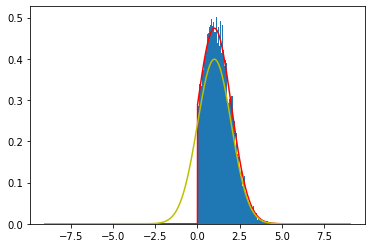

In [17]:
xx = np.linspace(-9,9,10000)

a0, b0 = 0, 100000
#a0, b0 = -100000, 0
mean, std = 1, 1
a, b = (a0 - mean) / std, (b0 - mean) / std

r = truncnorm.rvs(a, b, loc=mean, scale=std, size=10000)
plt.hist(r, bins= 80, density=True)

plt.plot(xx, truncnorm.pdf(xx, a, b, loc=mean, scale=std), color='r')
plt.plot(xx, truncnorm.pdf(xx, -b0, b0, loc=mean, scale=std), color='y')

plt.show()

**Implementation of the gibbs sampling algorithm** with 5000 draws after deleting the first 500.<br>
The algorithm output is the sequence of $\beta$ and the sequence of $\hat{\beta}_z$.

In [18]:
def gibbs_sampler(N=5000):
    beta_list = []
    betaZ_list = []
    z_list = []
    
    # Initialisation of the Markov chain
    beta_0 = np.random.multivariate_normal(a, A_1) # vecteur p*1
    beta_list.append(beta_0)
    z_0 = np.random.multivariate_normal(X@beta_0, np.eye(n)) # vecteur des zi -> shape n*1 
    z_list.append(z_0)
    
    # Propagation of the Markov chain
    for i in range(N+499):
        beta_new, betaZ_new = post_beta(z_list[-1])
        beta_list.append(beta_new)
        betaZ_list.append(betaZ_new)
        z_new = post_z(beta_list[-1])
        z_list.append(z_new)

    return np.array(beta_list[500:]), np.array(betaZ_list[500:])

### Loading data

In [19]:
y = y_nodal

X = X_nodal.values # -> contruire X avec les transfo n log des variables ? 
n, p = X.shape # nb d'individus, nb de var

X.shape, y.shape

((53, 5), (53,))

**Modify the vector X depending on the model chosen**

For model 9: y ~ C + log(x2) + x3 + x4 + x5 <br>
For model 8: y ~ C + log(x2) + x3 + x4

In [20]:
# Model 8
X[:,1] = np.log(X[:,1]) #x2 <- log(x2)
X[:,0] = 1 #x1 remplacé par la constante C
X = X[:,0:4] #remove x5

Update p the number of variable

In [21]:
p = X.shape[1] # nb de var
print("Number of variable selected =",p)

Number of variable selected = 4


Define and compute global variables

In [22]:
a = np.array([0.75]*p)

A_1 = np.diag([25]*p)
A = np.linalg.inv(A_1)
B = np.linalg.inv(A + X.T@X) # global variable as well

a.shape, A.shape

((4,), (4, 4))

### Marginal likelihood estimation

__Compute the estimate $\beta^*$__

In [23]:
%%time
beta_g, betaZ_g = gibbs_sampler()

CPU times: user 1min 44s, sys: 8.33 s, total: 1min 52s
Wall time: 1min 6s


In [24]:
beta_g.shape[0]

5000

In [25]:
beta_star = 1/beta_g.shape[0] * np.sum(beta_g, axis=0)
beta_star

array([-0.69968681,  1.46524329,  1.2661161 ,  1.07469158])

__Evaluate the log likelihood of the model chosen for $\beta^*$__

In [29]:
def likelihood(beta):
    p=1
    for i in range(0,53):
        xi = X[i,:]
        if y[i]==1 :
            p=p*norm.cdf(xi@beta, loc=0, scale=1)
        elif y[i]==0 :
            p=p*(1-norm.cdf(xi@beta, loc=0, scale=1))
    return(p)

In [30]:
r = likelihood(beta_star)
np.log(r)

-24.437859648893166

__Evaluate the prior in $\beta^*$__

In [31]:
s = multivariate_normal.pdf(beta_star, mean=a, cov=A_1)
np.log(s)

-10.173205087534313

__Estimate the posterior ordinate also in $\beta^*$__

In [32]:
def estim_post_ordinate(beta):
    s=0
    for i in range(0,len(beta_g)-1):
        s+= multivariate_normal.pdf(beta, mean=betaZ_g[i], cov=B)
    s=s/len(beta_g)
    return(s)

In [33]:
t = estim_post_ordinate(beta_star)
np.log(t)

-0.08018388262828686

Finaly, **compute the marginal likelihood of model m(y)**

In [34]:
m = np.log(r) + np.log(s) - np.log(t)
print("The log of the marginal likelihood of the model is %.3f" %m)

The log of the marginal likelihood of the model is -34.531
